<a href="https://colab.research.google.com/github/armanhm/Algorithmic_trading_with_python/blob/main/Algorithmic_trading(Moving_Average).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 7.9 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=48ea191f21a02e3fe195f3579617dc98288949bbb6649d33746db9b72fa29a55
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [12]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as web
from pandas_datareader import data as pdr
import yfinance as yf

In [48]:
plt.style.use("dark_background")

#The unit of moving average is "Day" 
#and you can change the first and second moving average to your time frames
first_moving_average = 30
second_moving_average = 100

In [49]:
start = dt.datetime.now() - dt.timedelta(days=365 * 3)
end = dt.datetime.now()

[*********************100%***********************]  1 of 1 completed


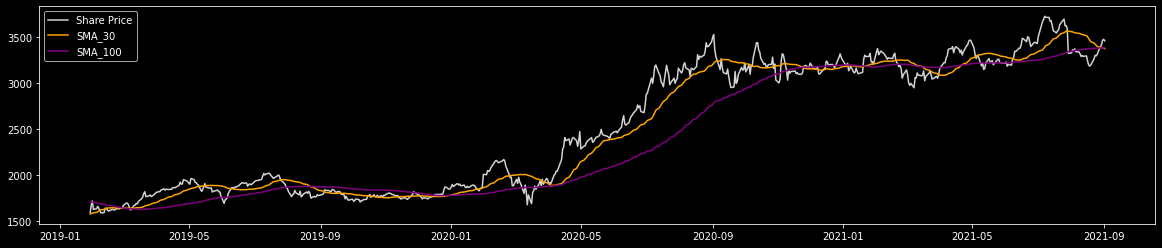

In [50]:
yf.pdr_override()

#You can replace the symbol with others like "FB" or "ETH-USD" or TSLA
symbol = "AMZN"

data = pdr.get_data_yahoo(symbol, start, end)

data[f'SMA_{first_moving_average}'] = data['Adj Close'].rolling(window = first_moving_average).mean()
data[f'SMA_{second_moving_average}'] = data['Adj Close'].rolling(window=ma_2).mean()

data = data.iloc[ma_2:]

plt.plot(data['Adj Close'], label="Share Price",color="lightgray")
plt.plot(data[f'SMA_{first_moving_average}'], label=f"SMA_{first_moving_average}", color="orange")
plt.plot(data[f'SMA_{second_moving_average}'], label=f"SMA_{second_moving_average}", color="purple")
plt.legend(loc="upper left")
plt.show()


In [51]:
buy_signals = []
sell_signals = []
trigger = 0

for x in range(len(data)):

  if data[f'SMA_{first_moving_average}'].iloc[x] > data[f'SMA_{second_moving_average}'].iloc[x] and trigger != 1:
    buy_signals.append(data['Adj Close'].iloc[x])
    sell_signals.append(float('nan'))
    trigger = 1

  elif data[f'SMA_{first_moving_average}'].iloc[x] < data[f'SMA_{second_moving_average}'].iloc[x] and trigger != -1:
    buy_signals.append(float('nan'))
    sell_signals.append(data['Adj Close'].iloc[x])
    trigger = -1

  else:
    buy_signals.append(float('nan'))
    sell_signals.append(float('nan'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


                   Open         High  ...  Buy Signals  Sell Signals
Date                                  ...                           
2019-01-29  1631.270020  1632.380005  ...          NaN   1593.880005
2019-01-30  1623.000000  1676.949951  ...          NaN           NaN
2019-01-31  1692.849976  1736.410034  ...          NaN           NaN
2019-02-01  1638.880005  1673.060059  ...          NaN           NaN
2019-02-04  1623.000000  1649.630005  ...          NaN           NaN
...                 ...          ...  ...          ...           ...
2021-08-27  3333.229980  3352.320068  ...          NaN           NaN
2021-08-30  3357.429932  3445.000000  ...          NaN           NaN
2021-08-31  3424.800049  3472.580078  ...          NaN           NaN
2021-09-01  3496.399902  3527.000000  ...          NaN   3479.000000
2021-09-02  3494.760010  3511.959961  ...          NaN           NaN

[656 rows x 10 columns]


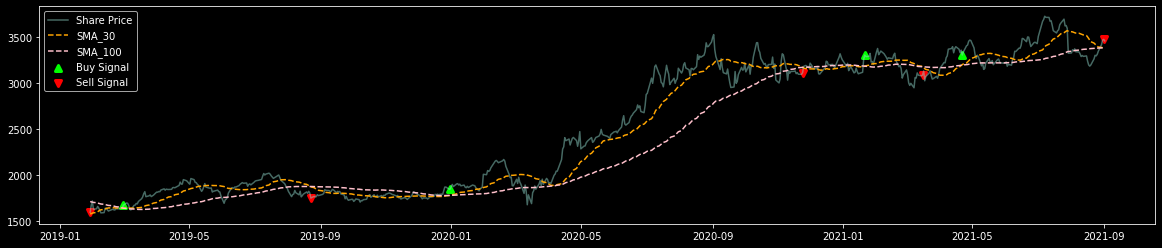

In [52]:
data['Buy Signals'] = buy_signals
data['Sell Signals'] = sell_signals

print(data)

plt.plot(data['Adj Close'], label="Share Price",alpha=0.5)
plt.plot(data[f'SMA_{first_moving_average}'], label=f"SMA_{first_moving_average}", color="orange", linestyle="--")
plt.plot(data[f'SMA_{second_moving_average}'], label=f"SMA_{second_moving_average}", color="pink", linestyle="--")
plt.scatter(data.index, data['Buy Signals'], label="Buy Signal", marker="^", color="#00ff00", lw=3)
plt.scatter(data.index, data['Sell Signals'], label="Sell Signal", marker="v", color="#ff0000", lw=3)
plt.legend(loc="upper left")
plt.show()
plt.rcParams["figure.figsize"] = (20,4)

**Red points** are sell signals and it is recommanded by algorithm to sell on these points.

On the other hand, **Green points** are buy signals and it is recommanded by algorithm to buy on those points.